# 🏏 IPL Player Performance (2008–2019)

### 📌 Step 1: Import Libraries

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

"libraries imported successfully"

'libraries imported successfully'

### 📥 Step 2: Load Datasets

In [60]:
matches=pd.read_csv("matches.csv")
deliveries=pd.read_csv("deliveries.csv")

"datasets loaded Successfully"

'datasets loaded Successfully'

### 👀 Step 3: Initial Exploration

In [61]:
matches.shape

(756, 18)

In [62]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [63]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   match_id         756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [64]:
matches.describe()

,match_id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [65]:
matches.isnull().sum()

match_id             0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [66]:
deliveries.shape

(179078, 21)

In [67]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [68]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [69]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [70]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

### 🧹 Step 4: Data Cleaning

In [71]:
matches["winner"]=matches["winner"].fillna("No Result")

In [72]:
matches.drop(columns=["umpire1","umpire2","umpire3"],inplace=True)

In [73]:
matches.isnull().sum()

match_id           0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

### 📊 Step 5: Univariate Analysis
Matches played by each team

In [74]:
team_matches=pd.concat([matches["team1"],matches["team2"]]).value_counts()

Text(0, 0.5, 'matches')

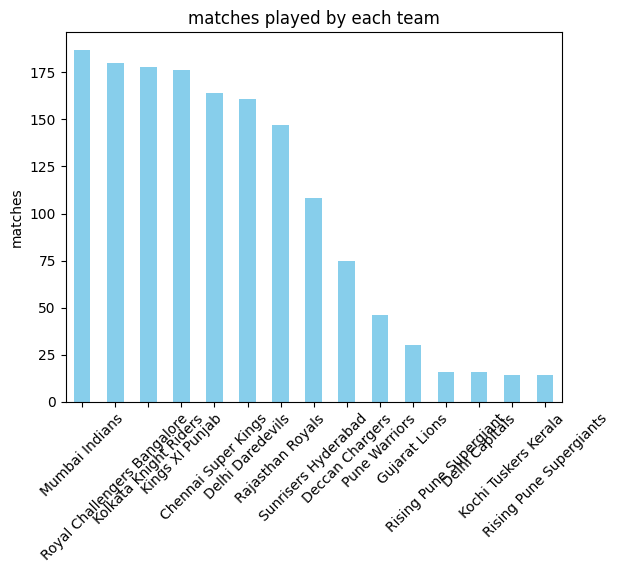

In [77]:
team_matches.plot(kind="bar",color="skyblue",title="matches played by each team")
plt.xticks(rotation=45) #It rotates the labels on the x-axis by 45 degrees to make them more readable.
plt.ylabel("matches")

### 🏆 Step 6: Most Wins by Teams

Text(0, 0.5, 'wins')

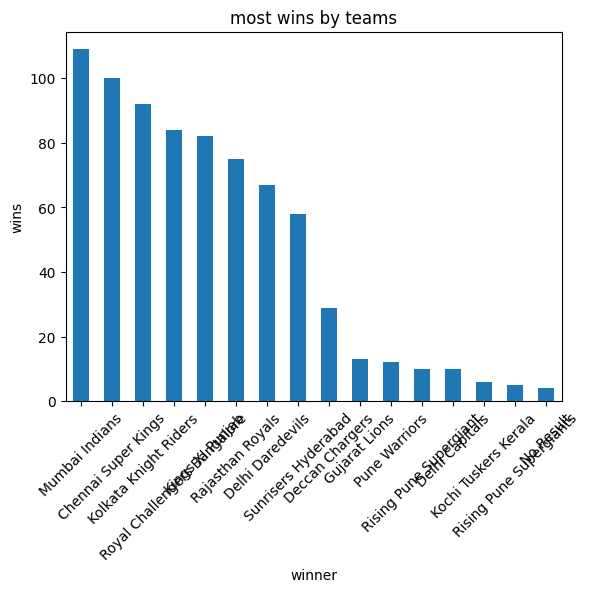

In [78]:
matches["winner"].value_counts().plot(kind='bar',title='most wins by teams')
plt.xticks(rotation=45)
plt.ylabel('wins')

### 🏃 Step 7: Top 10 Run Scorers

Text(0, 0.5, 'Total Runs')

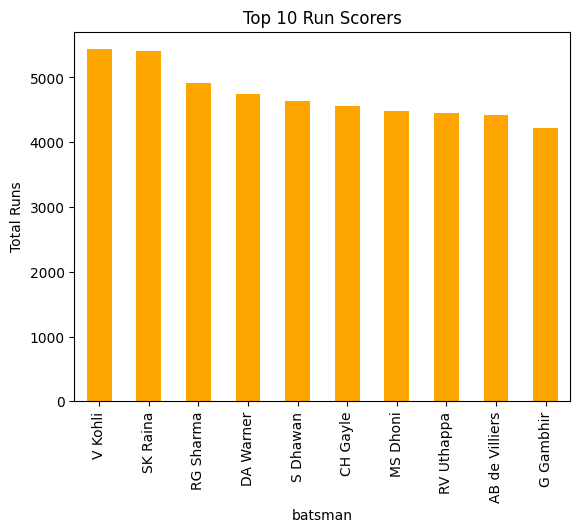

In [79]:
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)#Split the data by each batsman, Sum up their batsman_runs, Return total runs per batsman
top_batsmen.plot(kind='bar', color='orange', title='Top 10 Run Scorers')
plt.ylabel("Total Runs")

### ⚾ Step 8: Top 10 Wicket-Takers

Text(0, 0.5, 'Wickets')

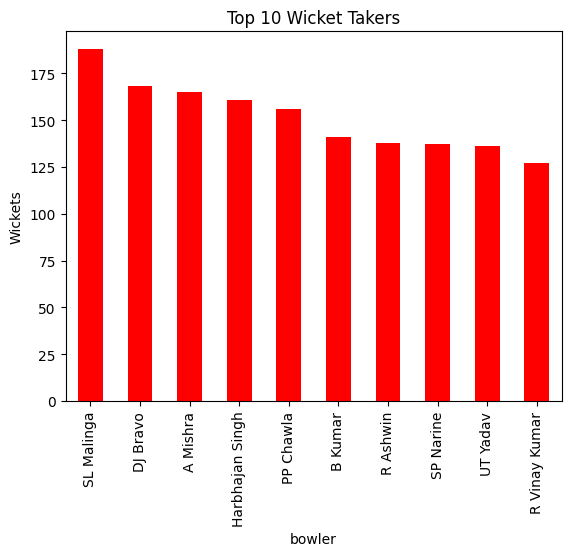

In [80]:
#It filters the deliveries DataFrame to only keep rows where a dismissal happened.
dismissals = deliveries[deliveries['dismissal_kind'].notnull()]
top_bowlers = dismissals['bowler'].value_counts().head(10)
top_bowlers.plot(kind='bar', color='red', title='Top 10 Wicket Takers')
plt.ylabel("Wickets")

### 🏟️ Step 9: Venues with Highest Average Scores

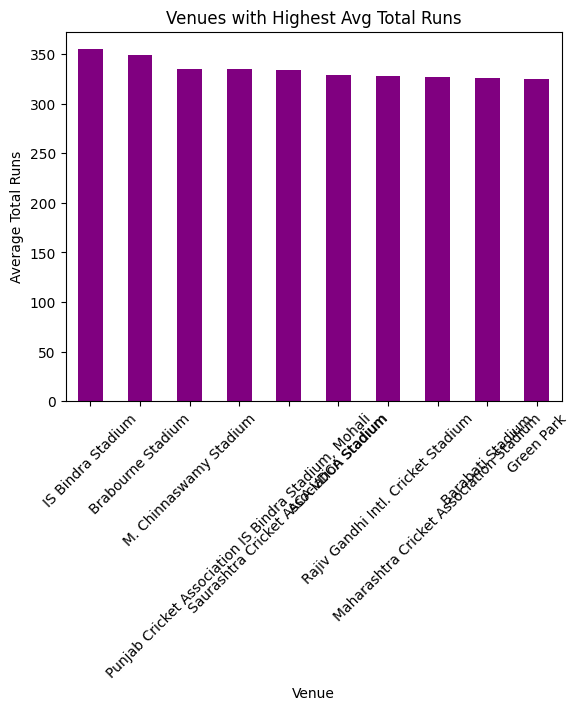

In [81]:
# Merge match-level info into ball-by-ball data
full_data = deliveries.merge(matches[['match_id', 'venue']], on='match_id', how='left')

# single column in groupby produce Series with simple indexes, perfect for direct plotting or inspection. They didn’t need to be converted back to DataFrames.
venue_scores = full_data.groupby(['match_id', 'venue'])['total_runs'].sum().reset_index()

# Average total runs by venue
avg_scores = venue_scores.groupby('venue')['total_runs'].mean().sort_values(ascending=False).head(10)

# Plot
avg_scores.plot(kind='bar', color='purple', title='Venues with Highest Avg Total Runs')
plt.ylabel("Average Total Runs")
plt.xlabel("Venue")
plt.xticks(rotation=45)
plt.show()


### 🔗 Step 10: Optional Merged Dataset

In [82]:
full_data = deliveries.merge(matches, on='match_id', how='left')
#Keep all rows from deliveries, Only add matching rows from matches where match_id matches

### 📈 Example: Runs per Season

Text(0, 0.5, 'Total Runs')

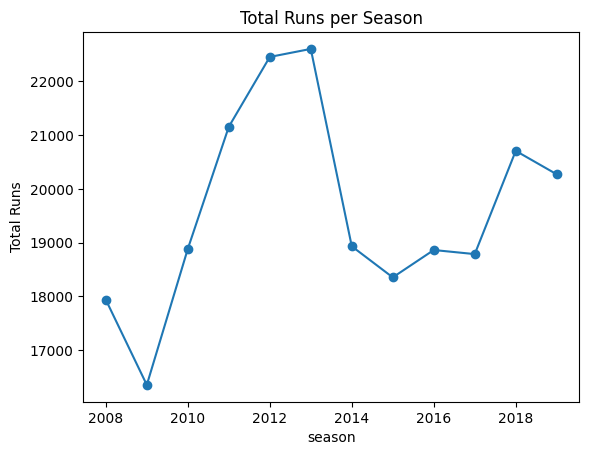

In [83]:
matches['season'] = matches['season'].astype(str)
#It converts the season column in the matches DataFrame from an integer type (e.g. 2020) to a string (e.g. '2020').
season_runs = deliveries.merge(matches[['match_id', 'season']], on='match_id')
season_total = season_runs.groupby('season')['total_runs'].sum()
season_total.plot(marker='o', title='Total Runs per Season')
plt.ylabel("Total Runs")